In [1]:
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
from langchain_groq import ChatGroq
llm=ChatGroq(model_name="deepseek-r1-distill-llama-70b")

a:\Agentic\venv\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [3]:
llm.invoke("What is the capital in delhi?")

AIMessage(content='<think>\nOkay, so I need to figure out the answer to the question, "What is the capital in Delhi?" Hmm, let me think about this. First, I know that Delhi is a city in India, but I\'m not entirely sure if it\'s the capital or if it has its own capital. Wait, I think Delhi itself is the capital of India. But the question is phrased as "the capital in Delhi," which is a bit confusing. Maybe they meant to ask what the capital of India is, and they mentioned Delhi, so the answer would be that Delhi is the capital. But perhaps they\'re asking if there\'s a capital within Delhi, like a smaller administrative area. I\'m not sure if that\'s the case. Let me break it down.\n\nDelhi is both a city and a union territory in India. It serves as the capital of the country. So, if someone is asking for the capital in Delhi, they might be mixing up the terms. It\'s possible they\'re trying to confirm that Delhi is the capital. Alternatively, maybe they\'re referring to a specific par

In [4]:
from langchain_core.tools import tool

In [5]:
from langchain_community.tools.tavily_search import TavilySearchResults

In [6]:
@tool
def multipy(a: int, b: int) -> int:
    """multiplies two numbers"""
    return a * b

In [7]:
multipy({"a":13,"b":5})

C:\Users\rohit\AppData\Local\Temp\ipykernel_14032\1431519667.py:1: LangChainDeprecationWarning: The method `BaseTool.__call__` was deprecated in langchain-core 0.1.47 and will be removed in 1.0. Use :meth:`~invoke` instead.
  multipy({"a":13,"b":5})


65

In [8]:
@tool
def search(query: str):
    """search the web for a query and return the results"""
    tavily=TavilySearchResults()
    result=tavily.invoke(query)
    return f"Result for {query} is: \n{result}"

In [9]:
print(search.invoke({"query":"What is the capital of France?"}))

C:\Users\rohit\AppData\Local\Temp\ipykernel_14032\2168271535.py:4: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily=TavilySearchResults()


Result for What is the capital of France? is: 
[{'title': 'List of capitals of France - Wikipedia', 'url': 'https://en.wikipedia.org/wiki/List_of_capitals_of_France', 'content': 'This is a chronological list of capitals of France. The capital of France has been Paris since its liberation in 1944.\n\n## Chronology\n\n[edit] [...] - Tours (10–13 June 1940), the city served as the temporary capital of France during World War II after the government fled Paris due to the German advance.\n- Bordeaux (June 1940), the government was relocated from Paris to Tours then Bordeaux very briefly during World War II, when it became apparent that Paris would soon fall into German hands. [...] - Paris (1789–1871), on 5 and 6 October 1789, a throng from Paris invaded the castle and forced the royal family to move back to Paris. The National Constituent Assembly "National Constituent Assembly (France)") followed the King to Paris soon afterward; Versailles lost its role of capital city.', 'score': 0.8993

In [10]:
tools=[multipy,search]

In [11]:
tools

[StructuredTool(name='multipy', description='multiplies two numbers', args_schema=<class 'langchain_core.utils.pydantic.multipy'>, func=<function multipy at 0x000001F25E7A6160>),
 StructuredTool(name='search', description='search the web for a query and return the results', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x000001F25E7A5B20>)]

In [12]:
llm_with_tools=llm.bind_tools(tools)

In [13]:
result=llm_with_tools.invoke("What is the capital of France?")

In [14]:
result.content

''

In [15]:
result.tool_calls

[{'name': 'search',
  'args': {'query': 'capital of France'},
  'id': '6wq9psevc',
  'type': 'tool_call'}]

In [16]:
result.tool_calls[0]

{'name': 'search',
 'args': {'query': 'capital of France'},
 'id': '6wq9psevc',
 'type': 'tool_call'}

In [17]:
result.tool_calls[0]["args"]

{'query': 'capital of France'}

In [18]:

result.tool_calls[0]["name"]


'search'

In [19]:
tool_mapping={tool.name:tool for tool in tools}

In [20]:
tool_mapping

{'multipy': StructuredTool(name='multipy', description='multiplies two numbers', args_schema=<class 'langchain_core.utils.pydantic.multipy'>, func=<function multipy at 0x000001F25E7A6160>),
 'search': StructuredTool(name='search', description='search the web for a query and return the results', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x000001F25E7A5B20>)}

In [21]:
tool_mapping["search"]

StructuredTool(name='search', description='search the web for a query and return the results', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x000001F25E7A5B20>)

In [22]:

#manually i am passing here
tool_mapping["search"].invoke({"query":"What is the capital of india?"})

'Result for What is the capital of india? is: \n[{\'title\': \'New Delhi\', \'url\': \'https://en.wikipedia.org/wiki/New_Delhi\', \'content\': \'Appearance\\n\\nmove to sidebar hide\\n\\nCoordinates: 28°36′50″N 77°12′32″E / 28.61389°N 77.20889°E / 28.61389; 77.20889\\n\\nImage 4: Page semi-protected\\n\\nFrom Wikipedia, the free encyclopedia\\n\\nCapital city of India\\n\\nThis article is about the capital of India, within the union territory of Delhi. For other uses, see New Delhi (disambiguation) "New Delhi (disambiguation)"). [...] New Delhi (/ˈ nj uː ˈ d ɛ.l i/ⓘ;( _\\\\_\\\\\\\\_Naī Dillī\\\\\\\\_\\\\__, pronounced( "Help:IPA/Hindi and Urdu")) is the capital of India and a part of the National Capital Territory of Delhi (NCT). New Delhi is the seat of all three branches of the Government of India, hosting the Rashtrapati Bhavan, Sansad Bhavan, and the Supreme Court. New Delhi is a municipality within the NCT, administered by the New Delhi Municipal Council (NDMC), which covers most

In [23]:
tool_mapping[result.tool_calls[0]["name"]].invoke(result.tool_calls[0]["args"])

'Result for capital of France is: \n[{\'title\': \'List of capitals of France - Wikipedia\', \'url\': \'https://en.wikipedia.org/wiki/List_of_capitals_of_France\', \'content\': \'This is a chronological list of capitals of France. The capital of France has been Paris since its liberation in 1944.\\n\\n## Chronology\\n\\n[edit] [...] - Tours (10–13 June 1940), the city served as the temporary capital of France during World War II after the government fled Paris due to the German advance.\\n- Bordeaux (June 1940), the government was relocated from Paris to Tours then Bordeaux very briefly during World War II, when it became apparent that Paris would soon fall into German hands. [...] - Paris (1789–1871), on 5 and 6 October 1789, a throng from Paris invaded the castle and forced the royal family to move back to Paris. The National Constituent Assembly "National Constituent Assembly (France)") followed the King to Paris soon afterward; Versailles lost its role of capital city.\', \'score\'

In [24]:
from typing import Annotated,Sequence, TypedDict
from langchain_core.messages import BaseMessage,AIMessage,HumanMessage
import operator

In [25]:
class AgentState(TypedDict):
    """State of the agent"""
    messages:Annotated[Sequence[BaseMessage],operator.add]

In [26]:
def invoke_model(state:AgentState):
    messages=state["messages"]
    question=messages[-1]
    response=llm_with_tools.invoke(question)
    return {"messages":[response]}

In [27]:
def router(state:AgentState):
    tool_calls=state["messages"][-1].tool_calls
    if(len(tool_calls)>0):
        return "tool" #key name
    else:
        return "end" #key name

In [28]:
def invoke_tool(state:AgentState):
    tool_details=state["messages"][-1].tool_calls
    if tool_details is None:
        return Exception("No tool details found")
    print(f"Selected tool: {tool_details[0]['name']}")
    if tool_details[0]["name"] =="search":
        response =input(prompt=f"[yes/no] Do you want to continue with this expensive web search")
        if response.lower()=="no":
             print("web search discarded by the user. exiting gracefully")
             raise Exception("Web search discarded by the user.")
    

    response=tool_mapping[tool_details[0]["name"]].invoke(tool_details[0]["args"])
    return {"messages":[response]}


In [29]:
tools

[StructuredTool(name='multipy', description='multiplies two numbers', args_schema=<class 'langchain_core.utils.pydantic.multipy'>, func=<function multipy at 0x000001F25E7A6160>),
 StructuredTool(name='search', description='search the web for a query and return the results', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x000001F25E7A5B20>)]


for which tool money might be requied: search tool

should we take pemission from human(user) before proceding with the taviley tool call?

In [30]:
from langgraph.graph import StateGraph,START,END

In [31]:
graph=StateGraph(AgentState)


eariler we were using the tool node from list of tool

but now we have crate tool invoke(custom funtion)

why we are doing it: as a user if we want to take a authority to which i need to give permission for execution

In [32]:
graph.add_node("ai_assistant",invoke_model)
graph.add_node("tool",invoke_tool)

In [33]:
graph.add_conditional_edges("ai_assistant",
                            router,
                            {"tool":"tool","end":END}
                            )


In [34]:
graph.add_edge("tool",END)

In [35]:
graph.set_entry_point("ai_assistant")

In [36]:
app=graph.compile()

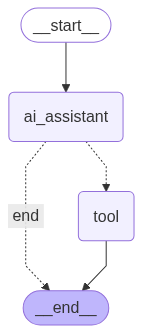

In [37]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))


In [38]:
app.invoke({"messages":["What is the current gdp of the india?"]})

Selected tool: search


{'messages': ['What is the current gdp of the india?',
  AIMessage(content='', additional_kwargs={'reasoning_content': 'Alright, the user is asking about the current GDP of India. I need to find this information accurately.\n\nFirst, I should use the search tool to look up the most recent data on India\'s GDP.\n\nI\'ll call the search function with the query "current GDP of India" to get relevant results.\n\nAfter getting the results, I\'ll extract the latest GDP figure and present it to the user.\n', 'tool_calls': [{'id': 'db6frzans', 'function': {'arguments': '{"query":"current GDP of India"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 106, 'prompt_tokens': 177, 'total_tokens': 283, 'completion_time': 0.468282237, 'prompt_time': 0.028894695, 'queue_time': 0.050319915, 'total_time': 0.497176932}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None},

In [39]:

app.invoke({"messages":["What is the multiplication of 5 and 20?"]})

Selected tool: multipy


{'messages': ['What is the multiplication of 5 and 20?',
  AIMessage(content='To find the product of 5 and 20, we use the multiplication function.\n\n', additional_kwargs={'reasoning_content': 'Okay, so I have this question: "What is the multiplication of 5 and 20?" Let me break it down. The user wants the product of 5 and 20. I know that multiplication is just repeated addition, so 5 times 20 is like adding 5 twenty times or adding 20 five times. Let me do the math: 5 multiplied by 20 equals 100. That seems straightforward. I should make sure to present the answer clearly, maybe using the function provided to double-check. Yeah, using the multipy function with a=5 and b=20 should give the correct result.\n', 'tool_calls': [{'id': '5qd2sk58z', 'function': {'arguments': '{"a":5,"b":20}', 'name': 'multipy'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 171, 'prompt_tokens': 178, 'total_tokens': 349, 'completion_time': 0.756889058, 'prompt_time': 0.024892

In [40]:

app.invoke({"messages":["What is the current weather in india delhi?"]})

Selected tool: search
web search discarded by the user. exiting gracefully


Exception: Web search discarded by the user.

# Langgraph inbuilt human in loop

In [41]:
tools

[StructuredTool(name='multipy', description='multiplies two numbers', args_schema=<class 'langchain_core.utils.pydantic.multipy'>, func=<function multipy at 0x000001F25E7A6160>),
 StructuredTool(name='search', description='search the web for a query and return the results', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x000001F25E7A5B20>)]

In [42]:
from langgraph.prebuilt import ToolNode,tools_condition
tool_node=ToolNode(tools)

In [43]:
class AgentState(TypedDict):
    messages:Annotated[Sequence[BaseMessage],operator.add]

In [44]:
llm_with_tools=llm.bind_tools(tools)

In [45]:
def ai_assistant(state:AgentState):
    response = llm_with_tools.invoke(state["messages"])
    return {"messages":[response]}

In [46]:
from langgraph.checkpoint.memory import MemorySaver
memory=MemorySaver()

In [48]:
graph_builder=StateGraph(AgentState)
graph_builder.add_node("ai_assistant",ai_assistant)
graph_builder.add_node("tools",tool_node)

In [49]:
graph_builder.add_edge(START,"ai_assistant")

In [50]:
graph_builder.add_conditional_edges(
    "ai_assistant",
    tools_condition,
)

In [51]:
graph_builder.add_edge("tools","ai_assistant")

In [ ]:
app2=graph_builder.compile(checkpointer=memory,interrupt_before=["tools"])

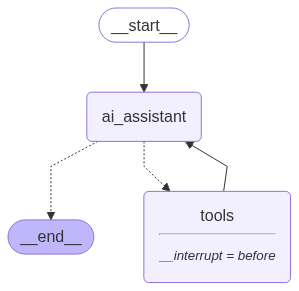

In [ ]:
from IPython.display import Image, display
display(Image(app2.get_graph().draw_mermaid_png()))

In [83]:
config={"configurable":{"thread_id":"1"}}

In [84]:
from langchain_core.messages import HumanMessage
response=app2.invoke({"messages":[HumanMessage("What is the current gdp of the china?")]},config=config)

In [85]:
response

{'messages': [HumanMessage(content='What is the multiplication of 5 and 20?', additional_kwargs={}, response_metadata={}),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'Alright, the user is asking for the multiplication of 5 and 20. I need to figure out how to respond using the tools provided. \n\nFirst, I check the available tools. There\'s a "multipy" function that multiplies two integers. That seems perfect for this query. \n\nI should structure the response using the required XML format. I\'ll call the "multipy" function with a=5 and b=20. \n\nI make sure to format the JSON correctly within the tool_call tag. \n\nThat should give the user the correct result of 100.\n', 'tool_calls': [{'id': '6ng55aswt', 'function': {'arguments': '{"a":5,"b":20}', 'name': 'multipy'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 144, 'prompt_tokens': 178, 'total_tokens': 322, 'completion_time': 0.61609237, 'prompt_time': 0.02501776, 'queue_time': 0

In [86]:
snapshot=app2.get_state(config)

In [87]:
snapshot

StateSnapshot(values={'messages': [HumanMessage(content='What is the multiplication of 5 and 20?', additional_kwargs={}, response_metadata={}), AIMessage(content='', additional_kwargs={'reasoning_content': 'Alright, the user is asking for the multiplication of 5 and 20. I need to figure out how to respond using the tools provided. \n\nFirst, I check the available tools. There\'s a "multipy" function that multiplies two integers. That seems perfect for this query. \n\nI should structure the response using the required XML format. I\'ll call the "multipy" function with a=5 and b=20. \n\nI make sure to format the JSON correctly within the tool_call tag. \n\nThat should give the user the correct result of 100.\n', 'tool_calls': [{'id': '6ng55aswt', 'function': {'arguments': '{"a":5,"b":20}', 'name': 'multipy'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 144, 'prompt_tokens': 178, 'total_tokens': 322, 'completion_time': 0.61609237, 'prompt_time': 0.025017

In [88]:
snapshot.next

('tools',)

In [89]:
last_message=snapshot.values["messages"][-1]

In [90]:
last_message

AIMessage(content='', additional_kwargs={'reasoning_content': 'Alright, the user is asking about China\'s current GDP again. I remember they asked the same question before, and I provided an approximate figure of $17.7 trillion. But now, I should check if there\'s any updated data.\n\nI should use the \'search\' tool to find the latest GDP figures. Let me structure the search query to get the most accurate results. Maybe searching for "China GDP 2023" will give me the latest statistics.\n\nOnce I get the search results, I\'ll extract the most recent GDP number. It\'s important to cite a reliable source like the National Bureau of Statistics of China or the IMF for credibility.\n\nI should present the information clearly, mentioning the year and the source. Also, I\'ll offer to provide further details if the user needs them. Keeping the response friendly and helpful is key.\n', 'tool_calls': [{'id': 'dzdnbntcs', 'function': {'arguments': '{"query":"China GDP 2023"}', 'name': 'search'}, 

In [91]:
tool_details=last_message.tool_calls

In [92]:
tool_details

[{'name': 'search',
  'args': {'query': 'China GDP 2023'},
  'id': 'dzdnbntcs',
  'type': 'tool_call'}]

In [93]:
tool_details[0]["name"]

'search'

In [94]:
if tool_details[0]["name"] =="search":
    response =input(prompt=f"[yes/no] Do you want to continue with this expensive web search")
    if response.lower()=="no":
         print("web search discarded by the user. exiting gracefully")
         raise Exception("Web search discarded by the user.")
    else:
         response=app2.invoke(None,config)
         print(response)
else:
    response=app2.invoke(None,config)
    print(response)

{'messages': [HumanMessage(content='What is the multiplication of 5 and 20?', additional_kwargs={}, response_metadata={}), AIMessage(content='', additional_kwargs={'reasoning_content': 'Alright, the user is asking for the multiplication of 5 and 20. I need to figure out how to respond using the tools provided. \n\nFirst, I check the available tools. There\'s a "multipy" function that multiplies two integers. That seems perfect for this query. \n\nI should structure the response using the required XML format. I\'ll call the "multipy" function with a=5 and b=20. \n\nI make sure to format the JSON correctly within the tool_call tag. \n\nThat should give the user the correct result of 100.\n', 'tool_calls': [{'id': '6ng55aswt', 'function': {'arguments': '{"a":5,"b":20}', 'name': 'multipy'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 144, 'prompt_tokens': 178, 'total_tokens': 322, 'completion_time': 0.61609237, 'prompt_time': 0.02501776, 'queue_time': 0.0

In [95]:
app2.invoke(None,config) #none means resume the last state or resume the process

{'messages': [HumanMessage(content='What is the multiplication of 5 and 20?', additional_kwargs={}, response_metadata={}),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'Alright, the user is asking for the multiplication of 5 and 20. I need to figure out how to respond using the tools provided. \n\nFirst, I check the available tools. There\'s a "multipy" function that multiplies two integers. That seems perfect for this query. \n\nI should structure the response using the required XML format. I\'ll call the "multipy" function with a=5 and b=20. \n\nI make sure to format the JSON correctly within the tool_call tag. \n\nThat should give the user the correct result of 100.\n', 'tool_calls': [{'id': '6ng55aswt', 'function': {'arguments': '{"a":5,"b":20}', 'name': 'multipy'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 144, 'prompt_tokens': 178, 'total_tokens': 322, 'completion_time': 0.61609237, 'prompt_time': 0.02501776, 'queue_time': 0

In [96]:
response=app2.invoke({"messages":[HumanMessage("What is the current gdp of the japan?")]},config=config)

In [97]:
response

{'messages': [HumanMessage(content='What is the multiplication of 5 and 20?', additional_kwargs={}, response_metadata={}),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'Alright, the user is asking for the multiplication of 5 and 20. I need to figure out how to respond using the tools provided. \n\nFirst, I check the available tools. There\'s a "multipy" function that multiplies two integers. That seems perfect for this query. \n\nI should structure the response using the required XML format. I\'ll call the "multipy" function with a=5 and b=20. \n\nI make sure to format the JSON correctly within the tool_call tag. \n\nThat should give the user the correct result of 100.\n', 'tool_calls': [{'id': '6ng55aswt', 'function': {'arguments': '{"a":5,"b":20}', 'name': 'multipy'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 144, 'prompt_tokens': 178, 'total_tokens': 322, 'completion_time': 0.61609237, 'prompt_time': 0.02501776, 'queue_time': 0

## Providing mannual response of the query 

In [98]:
snapshot=app2.get_state(config)

In [99]:
snapshot.next

('tools',)

In [100]:
last_message=snapshot.values["messages"][-1]

In [102]:
last_message.tool_calls

[{'name': 'search',
  'args': {'query': 'Japan GDP 2023'},
  'id': 'fjgakp8xq',
  'type': 'tool_call'}]

In [103]:
tool_call_id=last_message.tool_calls[0]["id"]
tool_call_id

'fjgakp8xq'

In [104]:

from langchain_core.messages import AIMessage,ToolMessage

In [105]:
new_message=[
    ToolMessage(content="according to the latest data 4.1 trillion USD",tool_call_id=tool_call_id),
    AIMessage(content="GDP is 4.1 Trillion USD.")
    
]

In [106]:
app2.update_state(config, 
                  {
                      "messages":new_message
                   }
                  )

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f07606c-620c-6dcf-8014-ae16e58dfbd1'}}

In [107]:
app2.get_state(config).values["messages"][-1]

AIMessage(content='GDP is 4.1 Trillion USD.', additional_kwargs={}, response_metadata={})

In [108]:
app2.invoke(None,config=config)

{'messages': [HumanMessage(content='What is the multiplication of 5 and 20?', additional_kwargs={}, response_metadata={}),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'Alright, the user is asking for the multiplication of 5 and 20. I need to figure out how to respond using the tools provided. \n\nFirst, I check the available tools. There\'s a "multipy" function that multiplies two integers. That seems perfect for this query. \n\nI should structure the response using the required XML format. I\'ll call the "multipy" function with a=5 and b=20. \n\nI make sure to format the JSON correctly within the tool_call tag. \n\nThat should give the user the correct result of 100.\n', 'tool_calls': [{'id': '6ng55aswt', 'function': {'arguments': '{"a":5,"b":20}', 'name': 'multipy'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 144, 'prompt_tokens': 178, 'total_tokens': 322, 'completion_time': 0.61609237, 'prompt_time': 0.02501776, 'queue_time': 0